# DATA260P Project 2: Bin Packing Algorithms

#### Connor McManigal and Aaron Mui

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/3m/d7f4z91511998gqg0bmhsy_00000gn/T/ipykernel_56672/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("binpacking_results.csv")

# Alter algorithm naming convention
def format_string(string_value):
    parts = string_value.strip("()").replace("'", "").split(", ")
    return parts[0] + parts[1]
df['Algorithm'] = df['Algos'].apply(format_string)
df2=df.drop('Algos', axis=1)

# Function for plotting
def plottype(df, algo, type, axes, inits=5):
    for i in range(inits):
        df_f = df[df['Algorithm'] == f'{algo}{i}']
        axes.loglog(df_f['Data Size'], df_f[type], label=f'Run {i + 1}')
    axes.legend()
    axes.grid()
    axes.set_title(f'{algo} {type} over {inits} runs')
    axes.set_xlabel('Log Data Size')
    axes.set_ylabel(f'Log {type}')

In [15]:
## Code block for testing
# df2.head()
print(df2[df2['Algorithm'] == 'FirstFitDec0'])
print('')
print(df2[df2['Algorithm'] == 'FirstFit0'])
print('')
print(df2[df2['Algorithm']=='BestFitDec0'])
print('')
print(df2[df2['Algorithm']=='BestFit0'])

    Data Size  Waste   Runtime     Algorithm
3         100      1  0.000269  FirstFitDec0
8         200      0  0.000770  FirstFitDec0
13        400      1  0.002352  FirstFitDec0
18        800      0  0.008405  FirstFitDec0
23       1600      1  0.030515  FirstFitDec0
28       3200      1  0.115034  FirstFitDec0
33       6400      2  0.462503  FirstFitDec0
38      12800      2  1.839782  FirstFitDec0
43      25600      2  7.567100  FirstFitDec0

    Data Size  Waste   Runtime  Algorithm
1         100      2  0.000142  FirstFit0
6         200      5  0.000396  FirstFit0
11        400      8  0.001410  FirstFit0
16        800     11  0.005645  FirstFit0
21       1600     18  0.021595  FirstFit0
26       3200     34  0.093103  FirstFit0
31       6400     56  0.368442  FirstFit0
36      12800    107  1.499072  FirstFit0
41      25600    214  5.959596  FirstFit0

    Data Size  Waste    Runtime    Algorithm
4         100      1   0.000519  BestFitDec0
9         200      0   0.001971  BestF

## NextFit

#### Descriptive Statistics

In [115]:
nextfit = df2[df2['Algorithm'].str.contains('NextFit0|NextFit1|NextFit2|NextFit3|NextFit4')]
mean_nf = nextfit.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
mean_nf = mean_nf.rename(columns={'Runtime': 'Mean Runtime','Waste': 'Mean Waste'})
print(mean_nf)

           Mean Waste  Mean Runtime
Data Size                          
100              13.8      0.000025
200              28.0      0.000043
400              56.0      0.000083
800             115.2      0.000179
1600            232.8      0.000389
3200            458.2      0.000726
6400            927.8      0.001593
12800          1842.4      0.003140
25600          3691.0      0.006365


#### Plotting Waste and Runtime on Log-Log Scale

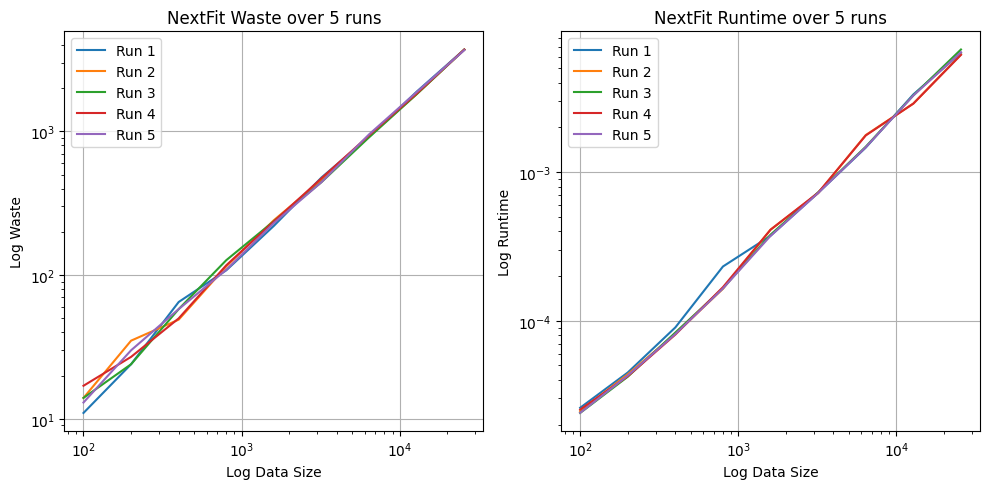

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plottype(df2, 'NextFit', 'Waste', axes[0])
plottype(df2, 'NextFit', 'Runtime', axes[1])
plt.tight_layout()
plt.show()

#### NextFit Results Diagnosis

**Estimated Waste Function of n**: 

# TODO!

**Estimated Big-O Runtime**:

# TODO!

**Results**:

# TODO!

## FirstFit

#### Descriptive Statistics

In [117]:
firstfit = df2[df2['Algorithm'].str.contains('FirstFit0|FirstFit1|FirstFit2|FirstFit3|FirstFit4')]
mean_ff = firstfit.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
mean_ff = mean_ff.rename(columns={'Runtime': 'Mean Runtime','Waste': 'Mean Waste'})
print(mean_ff)

           Mean Waste  Mean Runtime
Data Size                          
100               4.0      0.000117
200               6.2      0.000374
400               7.8      0.001376
800              13.4      0.005462
1600             20.4      0.022042
3200             35.6      0.091269
6400             58.8      0.368913
12800           109.2      1.493020
25600           208.8      6.011693


#### Plotting Waste and Runtime on Log-Log Scale

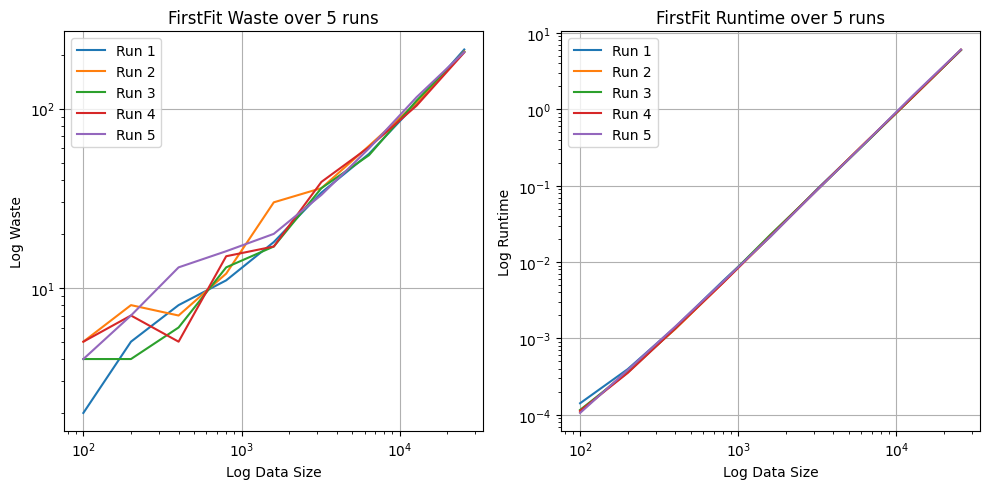

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plottype(df2, 'FirstFit', 'Waste', axes[0])
plottype(df2, 'FirstFit', 'Runtime', axes[1])
plt.tight_layout()
plt.show()

#### FirstFit Results Diagnosis

**Estimated Waste Function of n**: 

# TODO!

**Estimated Big-O Runtime**:

# TODO!

**Results**:

# TODO!

## BestFit

#### Descriptive Statistics

In [119]:
bestfit = df2[df2['Algorithm'].str.contains('BestFit0|BestFit1|BestFit2|BestFit3|BestFit4')]
mean_bf = bestfit.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
mean_bf = mean_bf.rename(columns={'Runtime': 'Mean Runtime','Waste': 'Mean Waste'})
print(mean_bf)

           Mean Waste  Mean Runtime
Data Size                          
100               3.2      0.000334
200               4.0      0.001175
400               5.8      0.004305
800               8.6      0.016775
1600             15.4      0.066545
3200             25.2      0.271225
6400             44.6      1.079753
12800            80.0      4.300489
25600           153.2     17.244141


#### Plotting Waste and Runtime on Log-Log Scale

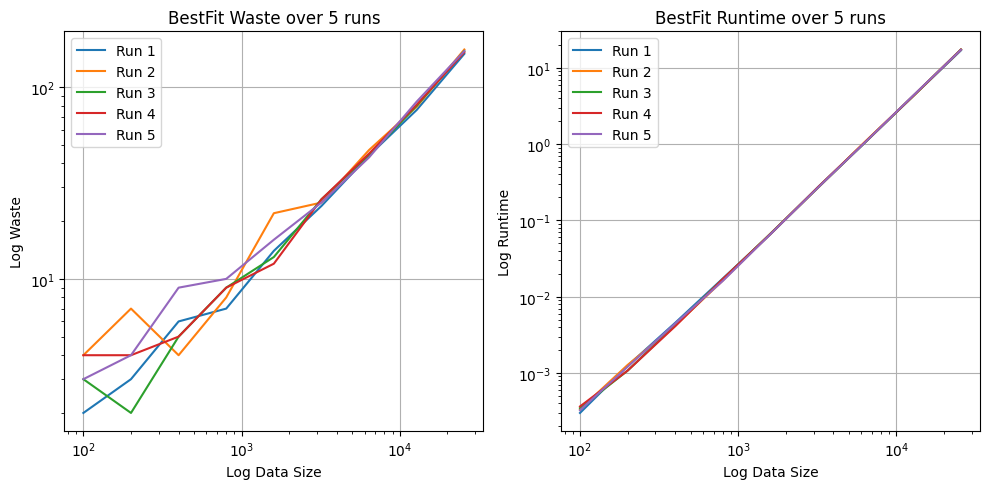

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plottype(df2, 'BestFit', 'Waste', axes[0])
plottype(df2, 'BestFit', 'Runtime', axes[1])
plt.tight_layout()
plt.show()

#### BestFit Results Diagnosis

**Estimated Waste Function of n**: 

# TODO!

**Estimated Big-O Runtime**:

# TODO!

**Results**:

# TODO!

## FirstFit Decreasing

#### Descriptive Statistics

In [121]:
firstfitdec = df2[df2['Algorithm'].str.contains('FirstFitDec0|FirstFitDec1|FirstFitDec2|FirstFitDec3|FirstFitDec4')]
mean_ffd = firstfitdec.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
mean_ffd = mean_ffd.rename(columns={'Runtime': 'Mean Runtime','Waste': 'Mean Waste'})
print(mean_ffd)

           Mean Waste  Mean Runtime
Data Size                          
100               1.8      0.000256
200               1.0      0.000719
400               0.4      0.002294
800               0.4      0.008022
1600              0.6      0.029936
3200              1.0      0.117961
6400              1.2      0.468665
12800             1.6      1.874910
25600             1.8      7.578692


#### Plotting Waste and Runtime on Log-Log Scale

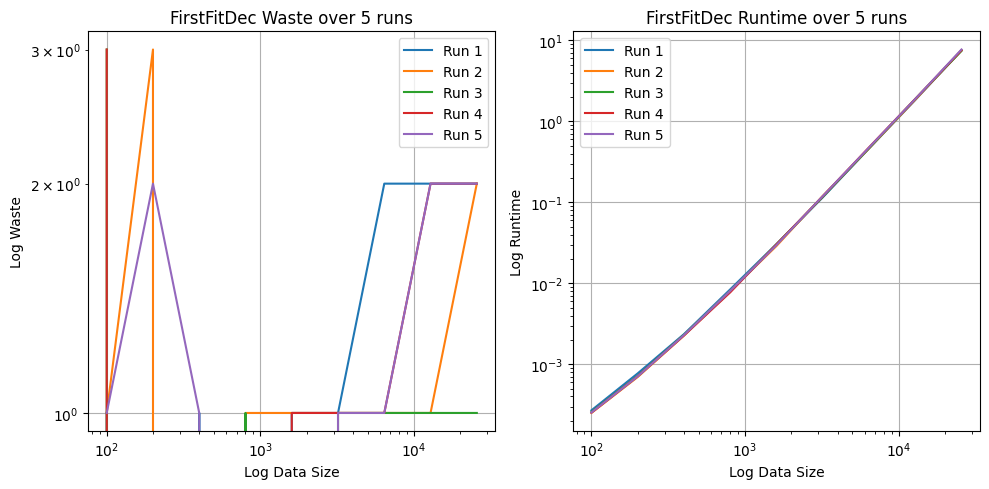

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plottype(df2, 'FirstFitDec', 'Waste', axes[0])
plottype(df2, 'FirstFitDec', 'Runtime', axes[1])
plt.tight_layout()
plt.show()

#### FirstFit Decreasing Results Diagnosis

**Estimated Waste Function of n**: 

# TODO!

**Estimated Big-O Runtime**:

# TODO!

**Results**:

# TODO!

## BestFit Decreasing

#### Descriptive Statistics

In [123]:
bestfitdec = df2[df2['Algorithm'].str.contains('BestFitDec0|BestFitDec1|BestFitDec2|BestFitDec3|BestFitDec4')]
mean_bfd = bestfitdec.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
mean_bfd = mean_bfd.rename(columns={'Runtime': 'Mean Runtime','Waste': 'Mean Waste'})
print(mean_bfd)

           Mean Waste  Mean Runtime
Data Size                          
100               1.8      0.000561
200               1.0      0.001879
400               0.2      0.006630
800               0.4      0.025327
1600              0.6      0.099441
3200              1.0      0.402627
6400              1.2      1.584413
12800             1.6      6.328879
25600             1.8     25.341147


#### Plotting Waste and Runtime on Log-Log Scale

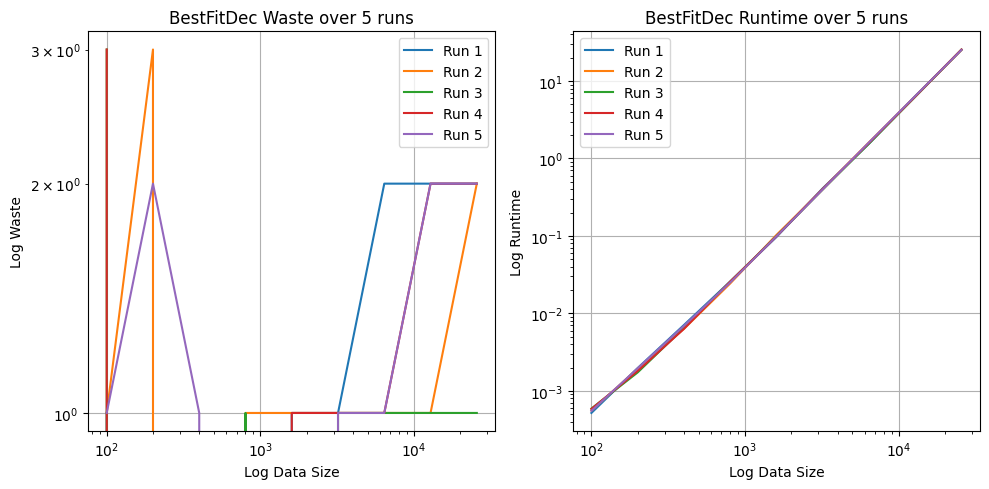

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plottype(df2, 'BestFitDec', 'Waste', axes[0])
plottype(df2, 'BestFitDec', 'Runtime', axes[1])
plt.tight_layout()
plt.show()

#### BestFit Decreasing Results Diagnosis

**Estimated Waste Function of n**: 

# TODO!

**Estimated Big-O Runtime**:

# TODO!

**Results**:

# TODO!

## CustomFit1

#### Motivation

# TODO!

#### Functionality Given Specific Test Case

# TODO!

#### How it matches up to optimal:

# TODO!

## CustomFit2